In [2]:
import os
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from skimage.transform import resize
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical 
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.model_selection import train_test_split

c:\Users\Weronika\Desktop\Big Data Analytics\TimeSeries\projekt\.venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Weronika\Desktop\Big Data Analytics\TimeSeries\projekt\.venv\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Weronika\Desktop\Big Data Analytics\TimeSeries\projekt\.venv\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


**Introduction**

Many biological and physical systems exhibit rhythmic processes. The periodic components of time series can be
extracted and quantified using the Fourier transform or other spectral analysis methods. However, the Fourier
transform is applicable to stationary signals, which means that its spectral and other features remain constant over
time. Fourier spectrum of a nonstationary signal is almost impossible to interpret. Signal nonstationarities are the
primary motivation for time-frequency analysis which involves, unlike Fourier transform, basis functions which are
localized both in time and frequency (wavepackets).

The continuous wavelet transform (CWT) of the function f(t) is defined as follows:

$$W(a, b) = \frac{1}{\sqrt{a}}∫_{-∞}^{∞}
f(t)Ψ∗\left(\frac{t − b}{a}\right)dt$$

Ψ in the above equation is called a mother function. The set of basis functions (wavelets) is obtained from the mother function by translation and scaling. The name wavelet means small wave, and this is indeed what a wavelet is. Each
”small wave” is compared to a signal (by means of integration) to see if parts of it match the shape of the wavelet.
In principle, there are infinitely many mother functions. In Fig. 1 we show two examples. These two wavelets have
totally different purposes, the Mexican Hat wavelet is used for edge detection whereas the Morlet wavelet is used
to determine the local frequency of a signal. Each scale a can be associated with the so-called pseudofrequency

$$f_a=
\frac{f_sf_c}
{a}$$

where fs is the sampling frequency and fc is the center frequency of a mother function.


**Project description**

You will use Human Activity Recognition Dataset (UCI-HAR). Each record in this set contains 9 signals measured
with the accelerometer and gyroscope of a smartphone:
* 3 components of body acceleration,
* 3 components of total acceleration,
* 3 angular velocities.

Signals were measured during six types of activities: WALKING, WALKING UPSTAIRS, WALKING DOWNSTAIRS,
SITTING, STANDING, LAYING. For each subject, you will apply CWT to all 9 signals to obtain 9 images of scaleograms. Then, these images will be fed to Convolutional Neural Network (CNN) to classify activity.


Tasks
1. Download the UCI-HAR dataset and load it into a numpy nd-array. In the downloaded package, there are
different folders for the train and test data sets. Prepare four arrays: two for the train/test signals and two for
the train/test labels. Each signal has 128 samples and 9 components. There are 7352 and 2947 records in the
training and testing set, respectively.
2. Apply CWT to each signal. Use the morlet wavelet (real) and scales from 1 to 128. Each procedure should
result in an 128 by 128 image.
3. Use the keras library to build a CNN made up of two convolutional and two max pooling layers. Set the kernel
size to 5 by 5 and employ the ReLU activation function. Use 10 epochs to train the model.
4. Plot training and test accuracies for each epoch.
5. Discuss the results.
6. Where eagles dare: Can you classify the data set using a simpler classifier?

4 Useful links
* https://web.iitd.ac.in/~sumeet/WaveletTutorial.pdf
* https://atoc.colorado.edu/research/wavelets/bams_79_01_0061.pdf

Link to dataset: https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones
paper: https://www.researchgate.net/publication/368288833_A_novel_Deep-Learning_model_for_Human_Activity_Recognition_based_on_Continuous_Wavelet_Transform

Second approach: download from UCI

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
!wget $url
!unzip -q "UCI HAR Dataset.zip"

link to cwt documentation: https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

In [15]:
wavelet = 'cmor1.5-1'
scales = range(1, 129)

def apply_cwt(data):
    coeffs, freqs = pywt.cwt(data, scales, wavelet)
    power = (np.abs(coeffs)) ** 2
    img = resize(power, (128, 128), anti_aliasing=True)
    return img

In [3]:
# Load the training data
train_signals1 = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt", header=None, delim_whitespace=True)
# Load the testing data
test_signals1 = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt", header=None, delim_whitespace=True)
# Load the training data
train_signals2 = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt", header=None, delim_whitespace=True)
# Load the testing data
test_signals2 = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt", header=None, delim_whitespace=True)
# Load the training data
train_signals3 = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt", header=None, delim_whitespace=True)
# Load the testing data
test_signals3 = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt", header=None, delim_whitespace=True)
# Load the training data
train_signals4 = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt", header=None, delim_whitespace=True)
# Load the testing data
test_signals4 = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt", header=None, delim_whitespace=True)
# Load the training data
train_signals5 = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt", header=None, delim_whitespace=True)
# Load the testing data
test_signals5 = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt", header=None, delim_whitespace=True)
# Load the training data
train_signals6 = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt", header=None, delim_whitespace=True)
# Load the testing data
test_signals6 = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt", header=None, delim_whitespace=True)
# Load the training data
train_signals7 = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt", header=None, delim_whitespace=True)
# Load the testing data
test_signals7 = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt", header=None, delim_whitespace=True)
# Load the training data
train_signals8 = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt", header=None, delim_whitespace=True)
# Load the testing data
test_signals8 = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt", header=None, delim_whitespace=True)
# Load the training data
train_signals9 = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt", header=None, delim_whitespace=True)
# Load the training data
test_signals9 = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt", header=None, delim_whitespace=True)


In [4]:
test_signals9.shape

(2947, 128)

In [ ]:
# Load the training data
train_signals = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt", header=None, delim_whitespace=True)
train_images1 = np.apply_along_axis(apply_cwt, 1, train_signals)
# Load the testing data
test_signals = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt", header=None, delim_whitespace=True)
test_images1 = np.apply_along_axis(apply_cwt, 1, test_signals)
# Load the training data
train_signals = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt", header=None, delim_whitespace=True)
train_images2 = np.apply_along_axis(apply_cwt, 1, train_signals)
# Load the testing data
test_signals = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt", header=None, delim_whitespace=True)
test_images2 = np.apply_along_axis(apply_cwt, 1, test_signals)
# Load the training data
train_signals = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt", header=None, delim_whitespace=True)
train_images3 = np.apply_along_axis(apply_cwt, 1, train_signals)
# Load the testing data
test_signals = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt", header=None, delim_whitespace=True)
test_images3 = np.apply_along_axis(apply_cwt, 1, test_signals)
# Load the training data
train_signals = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt", header=None, delim_whitespace=True)
train_images4 = np.apply_along_axis(apply_cwt, 1, train_signals)
# Load the testing data
test_signals = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt", header=None, delim_whitespace=True)
test_images4 = np.apply_along_axis(apply_cwt, 1, test_signals)
# Load the training data
train_signals = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt", header=None, delim_whitespace=True)
train_images5 = np.apply_along_axis(apply_cwt, 1, train_signals)
# Load the testing data
test_signals = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt", header=None, delim_whitespace=True)
test_images5 = np.apply_along_axis(apply_cwt, 1, test_signals)
# Load the training data
train_signals = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt", header=None, delim_whitespace=True)
train_images6 = np.apply_along_axis(apply_cwt, 1, train_signals)
# Load the testing data
test_signals = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt", header=None, delim_whitespace=True)
test_images6 = np.apply_along_axis(apply_cwt, 1, test_signals)
# Load the training data
train_signals = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt", header=None, delim_whitespace=True)
train_images7 = np.apply_along_axis(apply_cwt, 1, train_signals)
# Load the testing data
test_signals = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt", header=None, delim_whitespace=True)
test_images7 = np.apply_along_axis(apply_cwt, 1, test_signals)
# Load the training data
train_signals = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt", header=None, delim_whitespace=True)
train_images8 = np.apply_along_axis(apply_cwt, 1, train_signals)
# Load the testing data
test_signals = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt", header=None, delim_whitespace=True)
test_images8 = np.apply_along_axis(apply_cwt, 1, test_signals)
# Load the training data
train_signals = pd.read_csv("UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt", header=None, delim_whitespace=True)
train_images9 = np.apply_along_axis(apply_cwt, 1, train_signals)
# Load the training data
test_signals = pd.read_csv("UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt", header=None, delim_whitespace=True)
test_images9 = np.apply_along_axis(apply_cwt, 1, test_signals)

In [24]:
train_signals = np.stack([train_signals1, train_signals2, train_signals3,train_signals4, train_signals5, train_signals6,train_signals7, train_signals8, train_signals9], axis =-1)
print(train_signals.shape)
test_signals = np.stack([test_signals1, test_signals2, test_signals3,test_signals4, test_signals5, test_signals6,test_signals7, test_signals8, test_signals9], axis = -1)
print(test_signals.shape)

(7352, 128, 9)
(2947, 128, 9)


In [ ]:
train_images = np.stack([train_images1, train_images2, train_images3, train_images4, train_images5, train_images6, train_images7, train_images8, train_images9], axis =-1)
np.save("train_images.npy", train_images)
test_images = np.stack([test_images1, test_images2, test_images3, test_images4, test_images5, test_images6, test_images7, test_images8, test_images9], axis = -1)
np.save("test_images.npy", test_images)

In [4]:
train_images = np.load("train_images.npy")
test_images = np.load("test_images.npy")
print(test_images.shape)
print(train_images.shape)

(2947, 128, 128, 9)
(7352, 128, 128, 9)


In [5]:
data_train_y = pd.read_csv("UCI HAR Dataset/train/y_train.txt", header=None, delim_whitespace=True)
data_test_y  = pd.read_csv("UCI HAR Dataset/test/y_test.txt", header=None, delim_whitespace=True)

# convert labels to one-hot encoding
data_train_y = to_categorical(data_train_y - 1) 
data_test_y  = to_categorical(data_test_y - 1)

In [25]:
X_validate_raw, X_test_raw, y_validate_raw, y_test_raw = train_test_split(test_signals,data_test_y, test_size=0.5)
print(X_validate_raw.shape, X_test_raw.shape)

(1473, 128, 9) (1474, 128, 9)


In [7]:

X_validate, X_test, y_validate, y_test = train_test_split(test_images,data_test_y, test_size=0.5)
print(X_validate.shape, X_test.shape)

(1473, 128, 128, 9) (1474, 128, 128, 9)


Different motion presented by the same component scalegram (body_acc_x)

<Figure size 640x480 with 0 Axes>

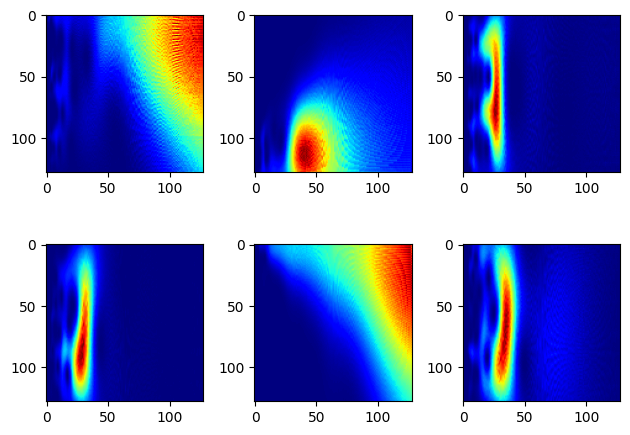

In [29]:
plt.figure()
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6))= plt.subplots(2,3);
ax1.imshow(train_images[0].T[0],cmap="jet")#5
ax2.imshow(train_images[30].T[0],cmap="jet")#4
ax3.imshow(train_images[114].T[0],cmap="jet")#1
ax4.imshow(train_images[129].T[0],cmap="jet")#3
ax5.imshow(train_images[64].T[0],cmap="jet")#6
ax6.imshow(train_images[163].T[0],cmap="jet")#2
fig.tight_layout()   
plt.show()

Different motion presented by the same component scalegram (body_gyro_z)

<Figure size 640x480 with 0 Axes>

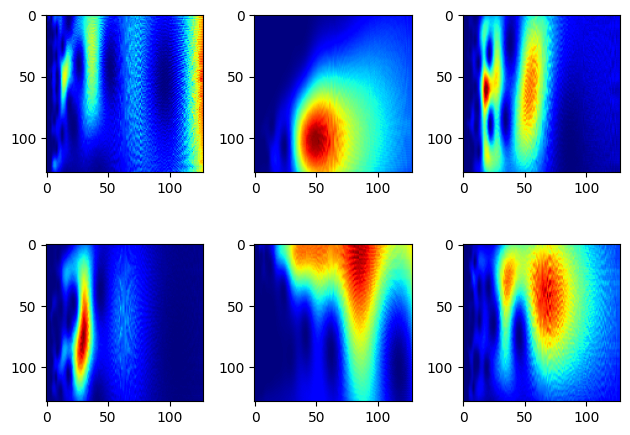

In [30]:
plt.figure()
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6))= plt.subplots(2,3);
ax1.imshow(train_images[0].T[5],cmap="jet")#5
ax2.imshow(train_images[30].T[5],cmap="jet")#4
ax3.imshow(train_images[114].T[5],cmap="jet")#1
ax4.imshow(train_images[129].T[5],cmap="jet")#3
ax5.imshow(train_images[64].T[5],cmap="jet")#6
ax6.imshow(train_images[163].T[5],cmap="jet")#2
fig.tight_layout()   
plt.show()

Different motion presented by the same component scalegram (total_acc_x)

<Figure size 640x480 with 0 Axes>

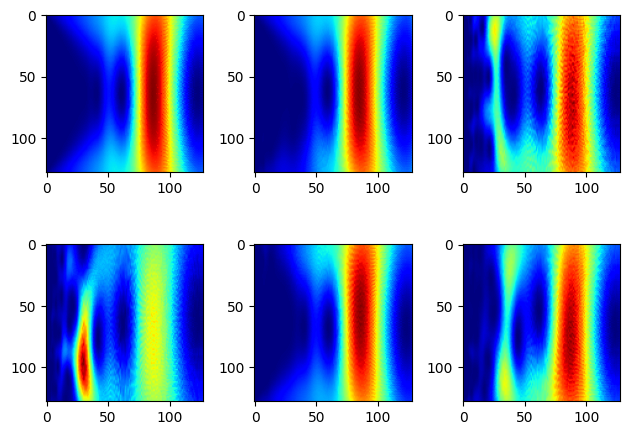

In [8]:
plt.figure()
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6))= plt.subplots(2,3);
ax1.imshow(train_images[0].T[6],cmap="jet")#5
ax2.imshow(train_images[30].T[6],cmap="jet")#4
ax3.imshow(train_images[114].T[6],cmap="jet")#1
ax4.imshow(train_images[129].T[6],cmap="jet")#3
ax5.imshow(train_images[64].T[6],cmap="jet")#6
ax6.imshow(train_images[163].T[6],cmap="jet")#2
fig.tight_layout()   
plt.show()

Representation of the same motion using different componenet scalegroam

<Figure size 640x480 with 0 Axes>

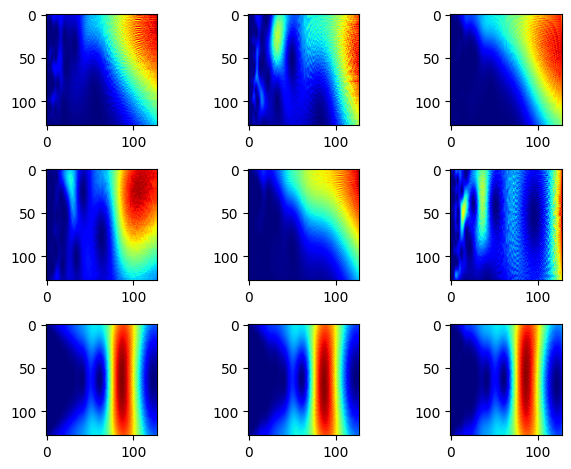

In [7]:
plt.figure()
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3,3);
ax1.imshow(train_images[0].T[0],cmap="jet")
ax2.imshow(train_images[0].T[1],cmap="jet")
ax3.imshow(train_images[0].T[2],cmap="jet")
ax4.imshow(train_images[0].T[3],cmap="jet")
ax5.imshow(train_images[0].T[4],cmap="jet")
ax6.imshow(train_images[0].T[5],cmap="jet")
ax7.imshow(train_images[0].T[6],cmap="jet")
ax8.imshow(train_images[0].T[7],cmap="jet")
ax9.imshow(train_images[0].T[8],cmap="jet")
fig.tight_layout()   
plt.show()

In [9]:
def plot_loss(train_loss, validation_loss, title, y):
    plt.grid(True)
    plt.xlabel("subsequent epochs")
    plt.ylabel(y)
    plt.plot(range(1, len(train_loss)+1), train_loss, 'o-', label='training')
    plt.plot(range(1, len(validation_loss)+1), validation_loss, 'o-', label='validation')
    plt.legend()
    plt.title(title)
    plt.show()

Training the model using nine components with raw data as input



In [26]:
model1 = Sequential()
model1.add(layers.LSTM(128,input_shape=(128,9)))
model1.add(layers.Dropout(0.4))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(6, activation='softmax'))
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model1.summary() 


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               70656     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 6)                 390       
                                                                 
Total params: 79,302
Trainable params: 79,302
Non-trainable params: 0
_________________________________________________________________


In [27]:
history_sig= model1.fit(train_signals, data_train_y,
                     epochs=10,
                     validation_data=(X_validate_raw, y_validate_raw),
                     batch_size=12)

Epoch 1/10
613/613 [==============================] - 21s 30ms/step - loss: 1.0312 - accuracy: 0.5641 - val_loss: 0.9015 - val_accuracy: 0.5947
Epoch 2/10
613/613 [==============================] - 18s 30ms/step - loss: 0.7840 - accuracy: 0.6718 - val_loss: 0.8369 - val_accuracy: 0.6660
Epoch 3/10
613/613 [==============================] - 19s 30ms/step - loss: 0.5709 - accuracy: 0.7705 - val_loss: 0.5431 - val_accuracy: 0.7984
Epoch 4/10
613/613 [==============================] - 19s 30ms/step - loss: 0.4393 - accuracy: 0.8351 - val_loss: 0.5141 - val_accuracy: 0.8045
Epoch 5/10
613/613 [==============================] - 19s 30ms/step - loss: 0.2727 - accuracy: 0.9026 - val_loss: 0.6098 - val_accuracy: 0.8072
Epoch 6/10
613/613 [==============================] - 18s 30ms/step - loss: 0.2251 - accuracy: 0.9227 - val_loss: 0.4150 - val_accuracy: 0.8391
Epoch 7/10
613/613 [==============================] - 18s 30ms/step - loss: 0.1991 - accuracy: 0.9282 - val_loss: 0.3430 - val_accuracy:

In [28]:
print(model1.metrics_names)
model1.evaluate(X_test_raw, y_test_raw)

['loss', 'accuracy']
47/47 [==============================] - 1s 16ms/step - loss: 0.2784 - accuracy: 0.9104


[0.2784353494644165, 0.9104477763175964]

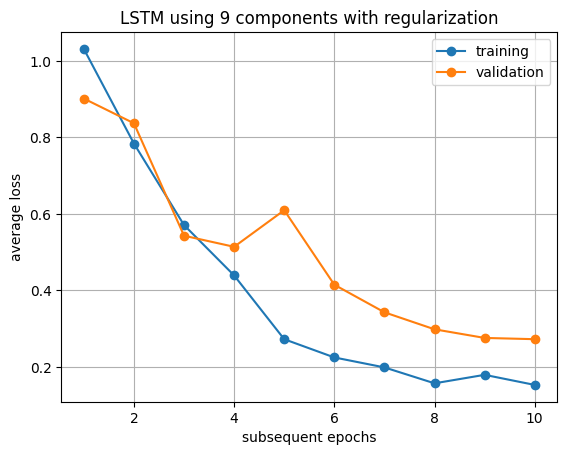

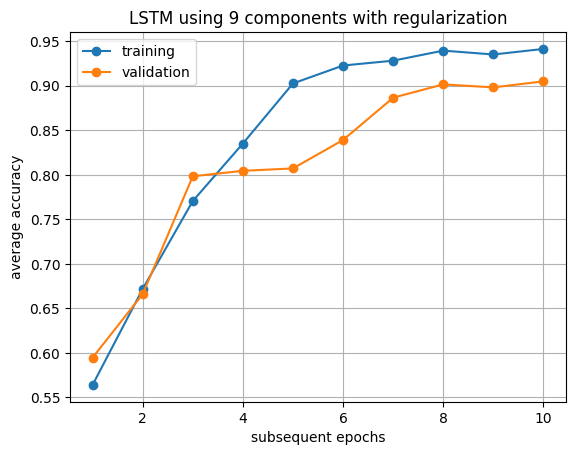

In [29]:
plot_loss(history_sig.history['loss'],history_sig.history['val_loss'], 'LSTM using 9 components with regularization', 'average loss')
plot_loss(history_sig.history['accuracy'],history_sig.history['val_accuracy'], 'LSTM using 9 components with regularization', 'average accuracy')

Training the model using one components with scalogram data as input



In [35]:
cnn15 = Sequential()
cnn15.add(layers.Conv2D(32, kernel_size=(5,5), activation='relu',input_shape=(128,128,1)))
cnn15.add(layers.MaxPool2D((2,2)))
cnn15.add(layers.Conv2D(64, kernel_size=(5,5), activation='relu'))
cnn15.add(layers.Dropout(0.4))
cnn15.add(layers.MaxPool2D((2,2)))
cnn15.add(layers.Flatten())
cnn15.add(layers.Dropout(0.4))
cnn15.add(layers.Dense(64, activation='relu'))
cnn15.add(layers.Dense(6, activation='softmax'))
cnn15.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
cnn15.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 64)        51264     
                                                                 
 dropout (Dropout)           (None, 58, 58, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 53824)             0

In [12]:
cnn1 = Sequential()
cnn1.add(layers.Conv2D(32, kernel_size=(5,5), activation='relu',input_shape=(128,128,1)))
cnn1.add(layers.MaxPool2D((2,2)))
cnn1.add(layers.Conv2D(64, kernel_size=(5,5), activation='relu'))
cnn1.add(layers.Dropout(0.4))
cnn1.add(layers.MaxPool2D((2,2)))
cnn1.add(layers.Flatten())
cnn1.add(layers.Dropout(0.4))
cnn1.add(layers.Dense(64, activation='relu'))
cnn1.add(layers.Dense(6, activation='softmax'))
cnn1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
cnn1.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 64)        51264     
                                                                 
 dropout (Dropout)           (None, 58, 58, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 53824)             0

In [36]:
X_validate5, X_test5, y_validate5, y_test5 = train_test_split(test_images[:,:,:,5],data_test_y, test_size=0.5)
print(X_validate5.shape, X_test5.shape)

(1473, 128, 128) (1474, 128, 128)


In [37]:
history15 = cnn15.fit(train_images[:,:,:,5], data_train_y,
                     epochs=10,
                     validation_data=(X_validate5, y_validate5),
                     batch_size=12)

Epoch 1/10
613/613 [==============================] - 108s 173ms/step - loss: 0.8876 - accuracy: 0.5396 - val_loss: 0.9510 - val_accuracy: 0.5207
Epoch 2/10
613/613 [==============================] - 104s 170ms/step - loss: 0.7945 - accuracy: 0.5807 - val_loss: 0.8421 - val_accuracy: 0.5967
Epoch 3/10
613/613 [==============================] - 104s 170ms/step - loss: 0.7551 - accuracy: 0.5997 - val_loss: 0.8350 - val_accuracy: 0.5886
Epoch 4/10
613/613 [==============================] - 105s 171ms/step - loss: 0.7259 - accuracy: 0.6181 - val_loss: 0.7856 - val_accuracy: 0.6205
Epoch 5/10
613/613 [==============================] - 106s 173ms/step - loss: 0.7023 - accuracy: 0.6261 - val_loss: 0.7693 - val_accuracy: 0.5838
Epoch 6/10
613/613 [==============================] - 107s 175ms/step - loss: 0.6780 - accuracy: 0.6442 - val_loss: 0.7923 - val_accuracy: 0.6225
Epoch 7/10
613/613 [==============================] - 106s 173ms/step - loss: 0.6654 - accuracy: 0.6506 - val_loss: 0.8117 -

In [38]:
print(cnn15.metrics_names)
cnn15.evaluate(X_test5, y_test5)

['loss', 'accuracy']
47/47 [==============================] - 4s 76ms/step - loss: 0.8835 - accuracy: 0.5807


[0.8834671378135681, 0.5807327032089233]

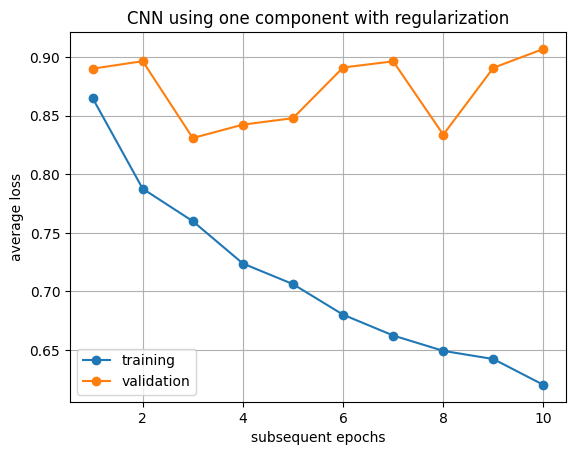

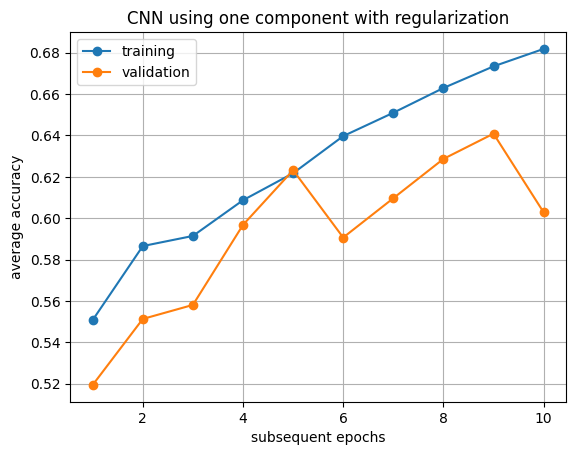

In [68]:
plot_loss(history15.history['loss'],history15.history['val_loss'], 'CNN using one component with regularization', 'average loss')
plot_loss(history15.history['accuracy'],history15.history['val_accuracy'], 'CNN using one component with regularization', 'average accuracy')

In [10]:
X_validate6, X_test6, y_validate6, y_test6 = train_test_split(test_images[:,:,:,6],data_test_y, test_size=0.5)
print(X_validate6.shape, X_test6.shape)

(1473, 128, 128) (1474, 128, 128)


In [13]:
history16 = cnn1.fit(train_images[:,:,:,6], data_train_y,
                     epochs=10,
                     validation_data=(X_validate6, y_validate6),
                     batch_size=12)

Epoch 1/10
613/613 [==============================] - 107s 170ms/step - loss: 0.4782 - accuracy: 0.7550 - val_loss: 0.4499 - val_accuracy: 0.7787
Epoch 2/10
613/613 [==============================] - 103s 168ms/step - loss: 0.3640 - accuracy: 0.7991 - val_loss: 0.4396 - val_accuracy: 0.7746
Epoch 3/10
613/613 [==============================] - 101s 164ms/step - loss: 0.3314 - accuracy: 0.8168 - val_loss: 0.3850 - val_accuracy: 0.8038
Epoch 4/10
613/613 [==============================] - 99s 162ms/step - loss: 0.3137 - accuracy: 0.8243 - val_loss: 0.4027 - val_accuracy: 0.8018
Epoch 5/10
613/613 [==============================] - 102s 166ms/step - loss: 0.3039 - accuracy: 0.8292 - val_loss: 0.3742 - val_accuracy: 0.8092
Epoch 6/10
613/613 [==============================] - 102s 167ms/step - loss: 0.2864 - accuracy: 0.8383 - val_loss: 0.3937 - val_accuracy: 0.7705
Epoch 7/10
613/613 [==============================] - 101s 164ms/step - loss: 0.2779 - accuracy: 0.8414 - val_loss: 0.3731 - 

In [14]:
print(cnn1.metrics_names)
cnn1.evaluate(X_test6, y_test6)

['loss', 'accuracy']
47/47 [==============================] - 3s 72ms/step - loss: 0.4204 - accuracy: 0.7456


[0.42036929726600647, 0.7455902099609375]

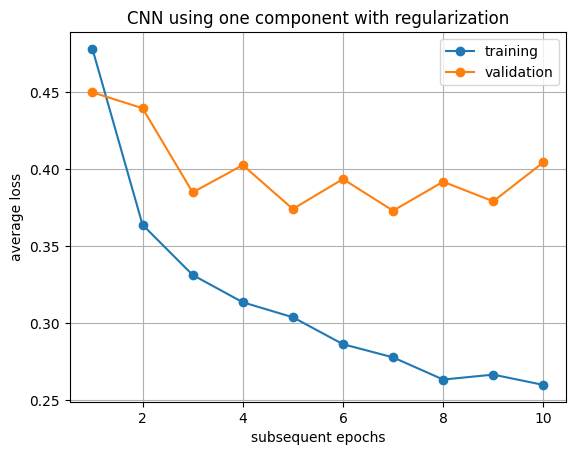

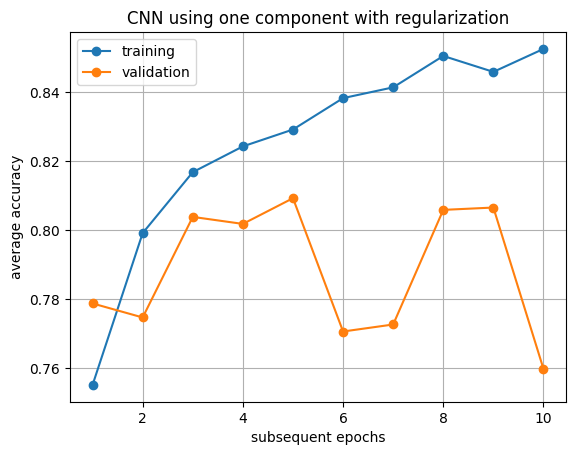

In [15]:
plot_loss(history16.history['loss'],history16.history['val_loss'], 'CNN using one component with regularization', 'average loss')
plot_loss(history16.history['accuracy'],history16.history['val_accuracy'], 'CNN using one component with regularization', 'average accuracy')

Training the model using nine components

In [16]:
cnn2 = Sequential()
cnn2.add(layers.Conv2D(32, kernel_size=(5,5), activation='relu',input_shape=(128,128,9)))
cnn2.add(layers.MaxPool2D((2,2)))
cnn2.add(layers.Conv2D(64, kernel_size=(5,5), activation='relu'))
cnn2.add(layers.Dropout(0.2))
cnn2.add(layers.MaxPool2D((2,2)))
cnn2.add(layers.Flatten())
cnn2.add(layers.Dense(64, activation='relu'))
cnn2.add(layers.Dense(6, activation='softmax'))
cnn2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
cnn2.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      7232      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        51264     
                                                                 
 dropout_2 (Dropout)         (None, 58, 58, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 53824)            

In [18]:
history2 = cnn2.fit(train_images, data_train_y,
                     epochs=10,
                     validation_data=(X_validate, y_validate),
                     batch_size=2)

Epoch 1/10
3676/3676 [==============================] - 241s 65ms/step - loss: 0.4810 - accuracy: 0.7833 - val_loss: 0.3696 - val_accuracy: 0.8065
Epoch 2/10
3676/3676 [==============================] - 193s 53ms/step - loss: 0.3575 - accuracy: 0.8286 - val_loss: 3.1686 - val_accuracy: 0.6565
Epoch 3/10
3676/3676 [==============================] - 193s 52ms/step - loss: 0.3351 - accuracy: 0.8360 - val_loss: 0.3382 - val_accuracy: 0.7997
Epoch 4/10
3676/3676 [==============================] - 191s 52ms/step - loss: 0.3041 - accuracy: 0.8449 - val_loss: 0.3640 - val_accuracy: 0.8248
Epoch 5/10
3676/3676 [==============================] - 189s 51ms/step - loss: 0.3184 - accuracy: 0.8755 - val_loss: 0.3522 - val_accuracy: 0.8900
Epoch 6/10
3676/3676 [==============================] - 198s 54ms/step - loss: 0.2821 - accuracy: 0.8932 - val_loss: 0.7069 - val_accuracy: 0.8540
Epoch 7/10
3676/3676 [==============================] - 200s 54ms/step - loss: 0.2620 - accuracy: 0.8991 - val_loss: 0

In [19]:
print(cnn2.metrics_names)
cnn2.evaluate(X_test, y_test)

['loss', 'accuracy']
47/47 [==============================] - 3s 59ms/step - loss: 0.2634 - accuracy: 0.9057


[0.26338842511177063, 0.9056987762451172]

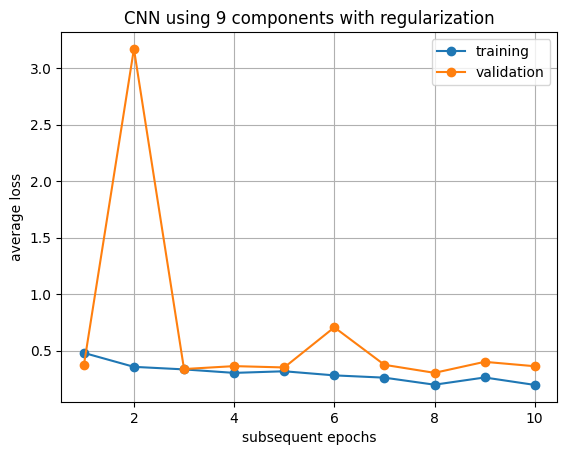

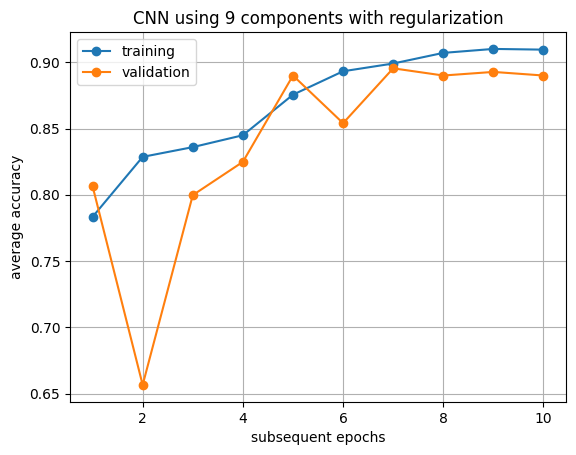

In [21]:
plot_loss(history2.history['loss'],history2.history['val_loss'], 'CNN using 9 components with regularization', 'average loss')
plot_loss(history2.history['accuracy'],history2.history['val_accuracy'], 'CNN using 9 components with regularization', 'average accuracy')

47/47 [==============================] - 1s 18ms/step
[3 0 3 ... 4 5 2]


<Axes: >

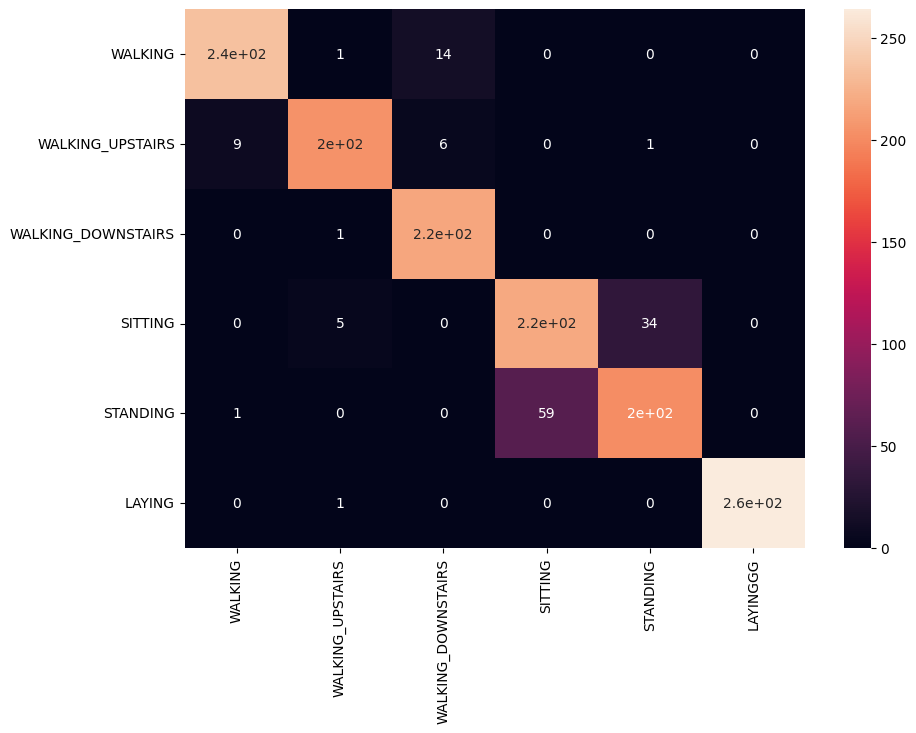

In [34]:
y_prediction = model1.predict(X_test_raw)
pre = np.argmax(y_prediction, axis= 1)
print(pre)
test = np.argmax(y_test_raw, axis= 1)
result = confusion_matrix(test, pre)
df_cm = pd.DataFrame(result, index =['WALKING', 'WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING'],
                  columns = ['WALKING', 'WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

47/47 [==============================] - 4s 79ms/step
[4 4 4 ... 4 4 4]


<Axes: >

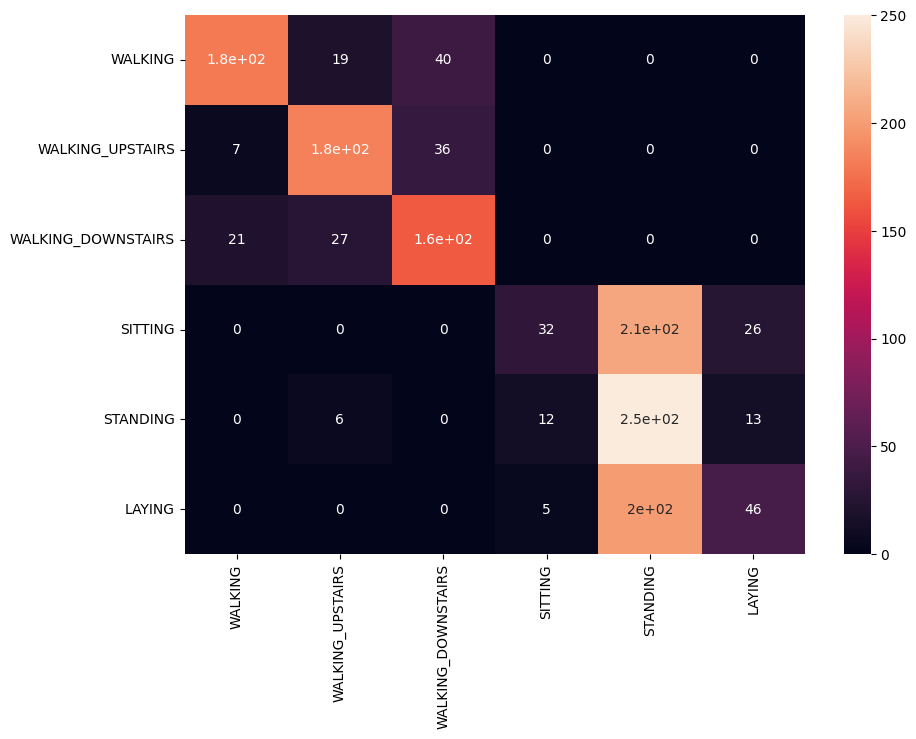

In [39]:
y_prediction = cnn15.predict(X_test5)
pre = np.argmax(y_prediction, axis= 1)
print(pre)
test = np.argmax(y_test5, axis= 1)
result = confusion_matrix(test, pre)
df_cm = pd.DataFrame(result, index = ['WALKING', 'WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING'],
                  columns = ['WALKING', 'WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

47/47 [==============================] - 2s 48ms/step
[0 2 1 ... 2 1 3]


<Axes: >

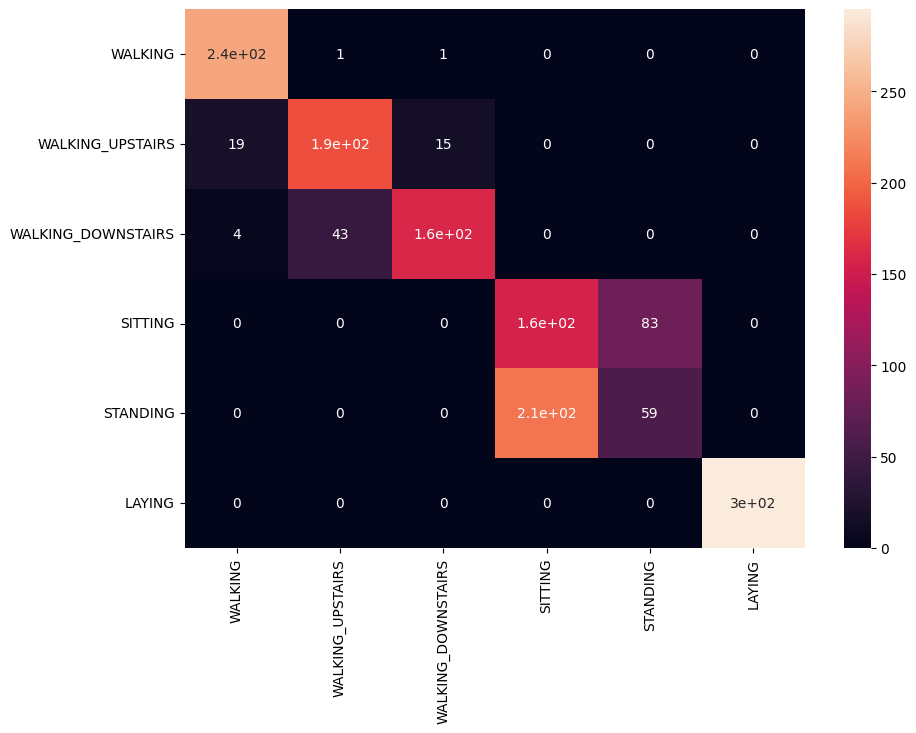

In [31]:
y_prediction = cnn1.predict(X_test6)
pre = np.argmax(y_prediction, axis= 1)
print(pre)
test = np.argmax(y_test6, axis= 1)
result = confusion_matrix(test, pre)
df_cm = pd.DataFrame(result, index = ['WALKING', 'WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING'],
                  columns = ['WALKING', 'WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

47/47 [==============================] - 3s 58ms/step
[5 4 4 ... 1 5 0]


<Axes: >

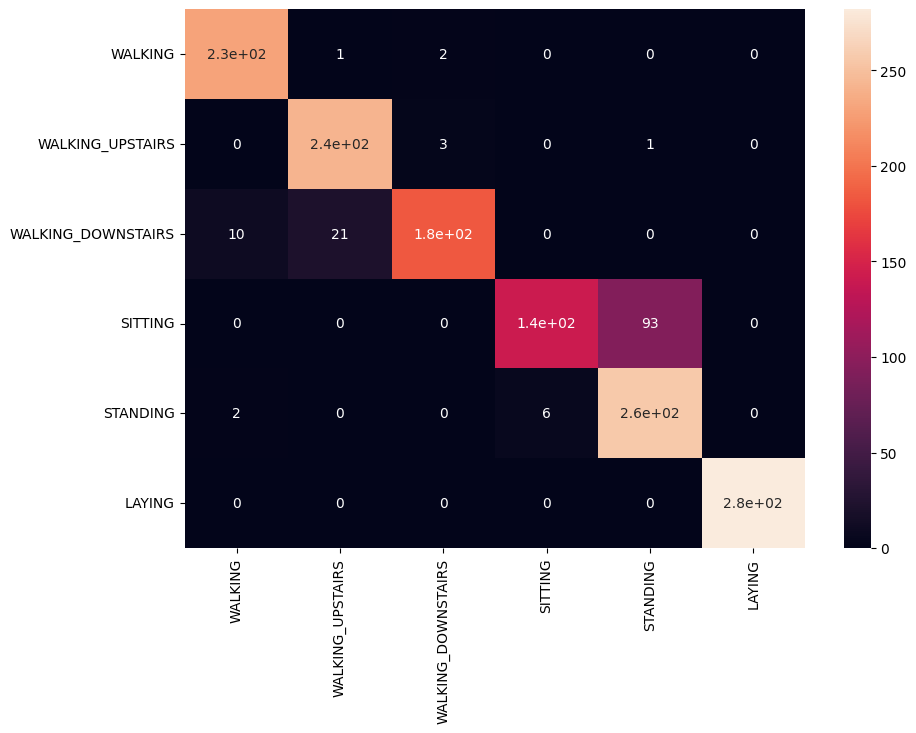

In [33]:
y_prediction = cnn2.predict(X_test)
pre = np.argmax(y_prediction, axis= 1)
print(pre)
test = np.argmax(y_test, axis= 1)
result = confusion_matrix(test, pre)
df_cm = pd.DataFrame(result, index = ['WALKING', 'WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING'],
                  columns = ['WALKING', 'WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)